In [8]:

#TIME SERIES FORECASTING -- RAHUl AGGARWAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:

data = pd.read_csv('AirPassengers.csv')

In [4]:

data

#exogenous variables


#endogenous and exogenous variable


ARIMA
ARIMAX


SARIMA
SARIMAX

VARIMA
VARIMAX


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [10]:


print ('\n Data Types:')
print (data.dtypes)



 Data Types:
Month          object
#Passengers     int64
dtype: object


In [6]:
data

#dd-mm-yyyy


1949-03

1949-03-01

yyyy-mm-dd

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [11]:
import datetime


#yyyy mm
#Y m



In [12]:
import pandas as pd

pd.datetime.strptime("1960", '%Y')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


datetime.datetime(1960, 1, 1, 0, 0)

In [14]:
#LUNAR
#GREGORIAN


# The data contains a particular month and number of passengers travelling in that month. 
#In order to read the data as a time series, we have to pass special arguments to the read_csv command:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

#dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

data.head()

## NOTE: You can run remaining codes in this article as well, using this live coding window.


##parsing



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:

data


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
MA
WMA

w1a+w2b/w1+w2

AR

ARMA
ARIMA -- I integration----diferencing term



SARIMA
VARIMA

------------------------

EXP SMOOTHING -- HOLT-WINTER

SES --wma
Double ES  ----  trend
TRIPLE ES --- trend and season

-------------------------


RNN and LSTM

=======================================




Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: #Passengers, Length: 144, dtype: float64

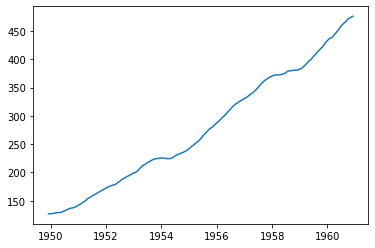

In [28]:

moving_avg = pd.Series(data["#Passengers"]).rolling(window=12).mean()
moving_avg.head(20)



plt.plot(moving_avg)

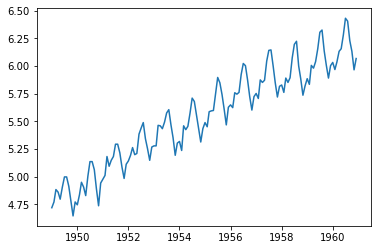

In [29]:
ts=data

ts_log = np.log(ts)
plt.plot(ts_log)

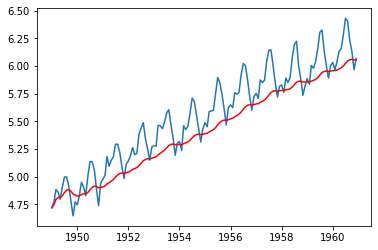

In [18]:

expwighted_avg = ts_log.ewm(halflife=12).mean()


plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



In [25]:

residual.head(100)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1956-12-01   -0.008792
1957-01-01   -0.004277
1957-02-01   -0.032018
1957-03-01   -0.008046
1957-04-01   -0.010242
Name: resid, Length: 100, dtype: float64

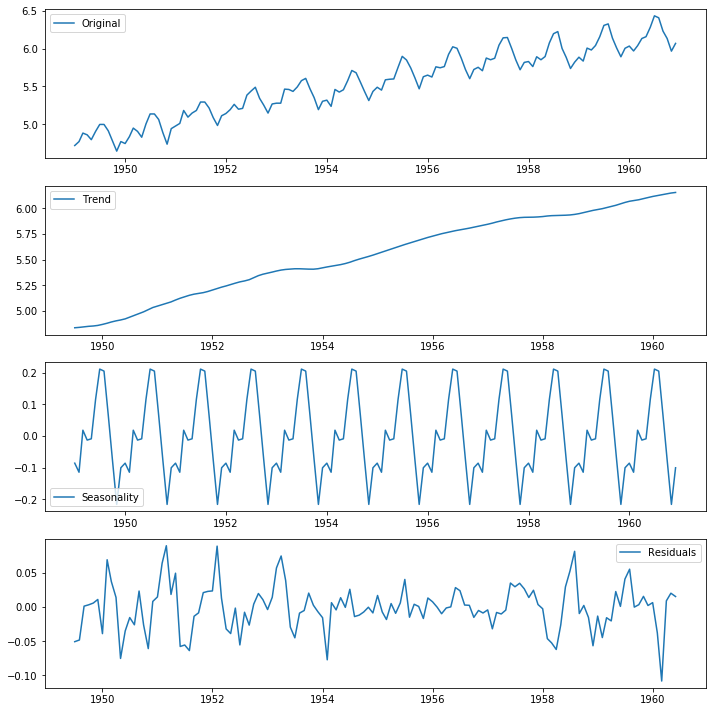

In [26]:

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(data["#Passengers"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


yt   =  data["#Passengers"]
yt-1 = data["#Passengers"].shift(1)
yt-2 = data["#Passengers"].shift(2)


#yt=yt-1 * b1 + yt-2 * b2



#DIFFERENCING
yt1 = data["#Passengers"] - data["#Passengers"].shift(1)  ---ERROR 
yt2 = data["#Passengers"] - data["#Passengers"].shift(2)  ---ERROR 
yt=yt1 * b1 + yt2 * b2


#MA
yt1 = ma(data["#Passengers"],window=2)
yt=yt1 * b1 




window --- 2

2   na      na  
3   na       na
4   3.4     .6
5   4.5     .5
6   4.2     1.8
?

In [21]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


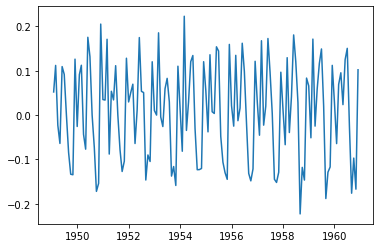

In [30]:
ts_log_diff = ts_log["#Passengers"] - ts_log["#Passengers"].shift()


ARMA

ARIMA
SARIMA



#shift of 1

plt.plot(ts_log_diff)

In [33]:
#DIFFRENCING


pd.concat([ts_log["#Passengers"] , ts_log["#Passengers"].shift(2)],axis=1)




,#Passengers,#Passengers
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,4.718499
1949-04-01,4.859812,4.770685
1949-05-01,4.795791,4.882802
...,...,...
1960-08-01,6.406880,6.282267
1960-09-01,6.230481,6.432940
1960-10-01,6.133398,6.406880


??datetime

121  = 129 * .5 + 132 *.2  +118 *0 + 112*0  ==MA model [lag=2]  == 119
error =121=119

RMSE
---ARMA (lag1,lag2)


121  = 129 * .5 + 132 *.2  +118 *0.002 + 112*0.......+  ==AR model [lag=300]  == 119.999999

error--reduce  ----

In [24]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [25]:
data.index





DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [26]:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [27]:
#1. Specific the index as a string constant:
ts['1949-01-01']

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [7]:
from datetime import datetime

datetime(1949,4,7)



datetime.datetime(1949, 4, 7, 0, 0)

In [28]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [29]:
ts['1949']


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

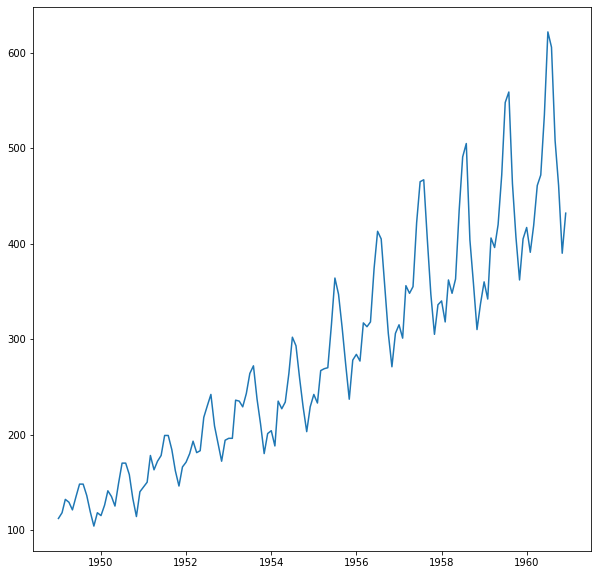

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.plot(ts)


In [31]:
from statsmodels.tsa.stattools import adfuller





In [32]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
   # rolmean = pd.rolling_mean(timeseries, window=12)

    #rolstd = pd.rolling_std(timeseries, window=12)

    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    
    
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:') 
    
    dftest = adfuller(timeseries, autolag='AIC')
    #PP
    #KPSS
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

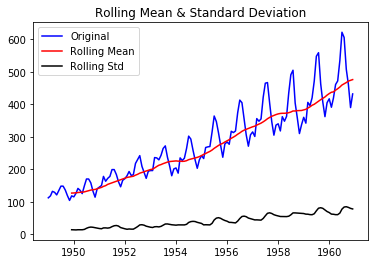

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
test_stationarity(ts)


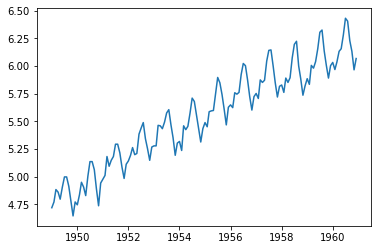

In [34]:
ts_log = np.log(ts)
plt.plot(ts_log)

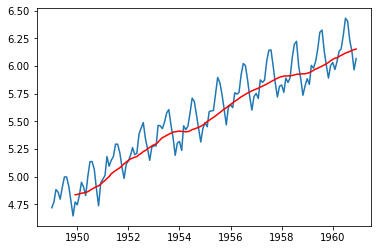

In [35]:
#moving_avg = pd.rolling_mean(ts_log,12)
moving_avg = pd.Series(ts_log).rolling(window=12).mean()



plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [36]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

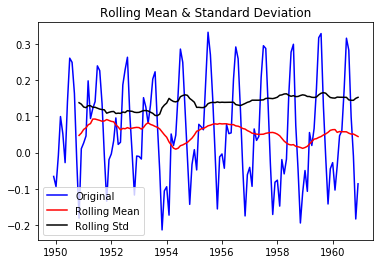

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [38]:
ts_log_moving_avg_diff.dropna(inplace=True)

test_stationarity(ts_log_moving_avg_diff)

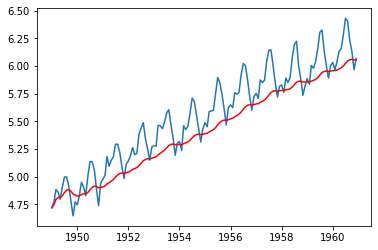

In [39]:
#expwighted_avg = pd.ewma(ts_log, halflife=12)
expwighted_avg = ts_log.ewm( halflife=12).mean()

## ??df_test_ewma = df_test.ewm(span=2).mean()


plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

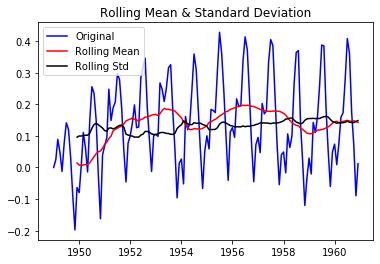

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [40]:
ts_log_ewma_diff = ts_log - expwighted_avg

#ts_log_moving_avg_diff
test_stationarity(ts_log_ewma_diff)

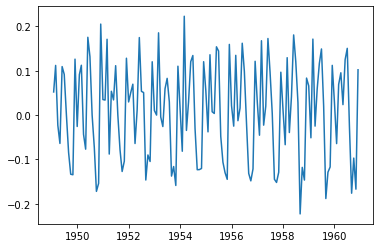

In [41]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

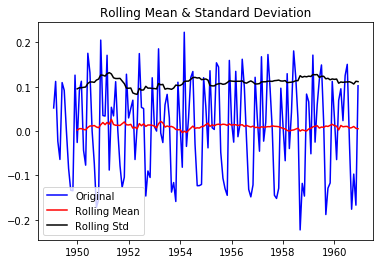

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [42]:


ts_log_diff.dropna(inplace=True)

test_stationarity(ts_log_diff)

In [ ]:
#https://medium.com/analytics-vidhya/time-series-forecasting-sarima-vs-auto-arima-models-f95e76d71d8f#:~:text=ARIMA%20is%20a%20model%20that,future%20points%20in%20the%20series.&text=MA(q)%20stands%20for%20moving,with%20time%20series%20with%20seasonality.

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose



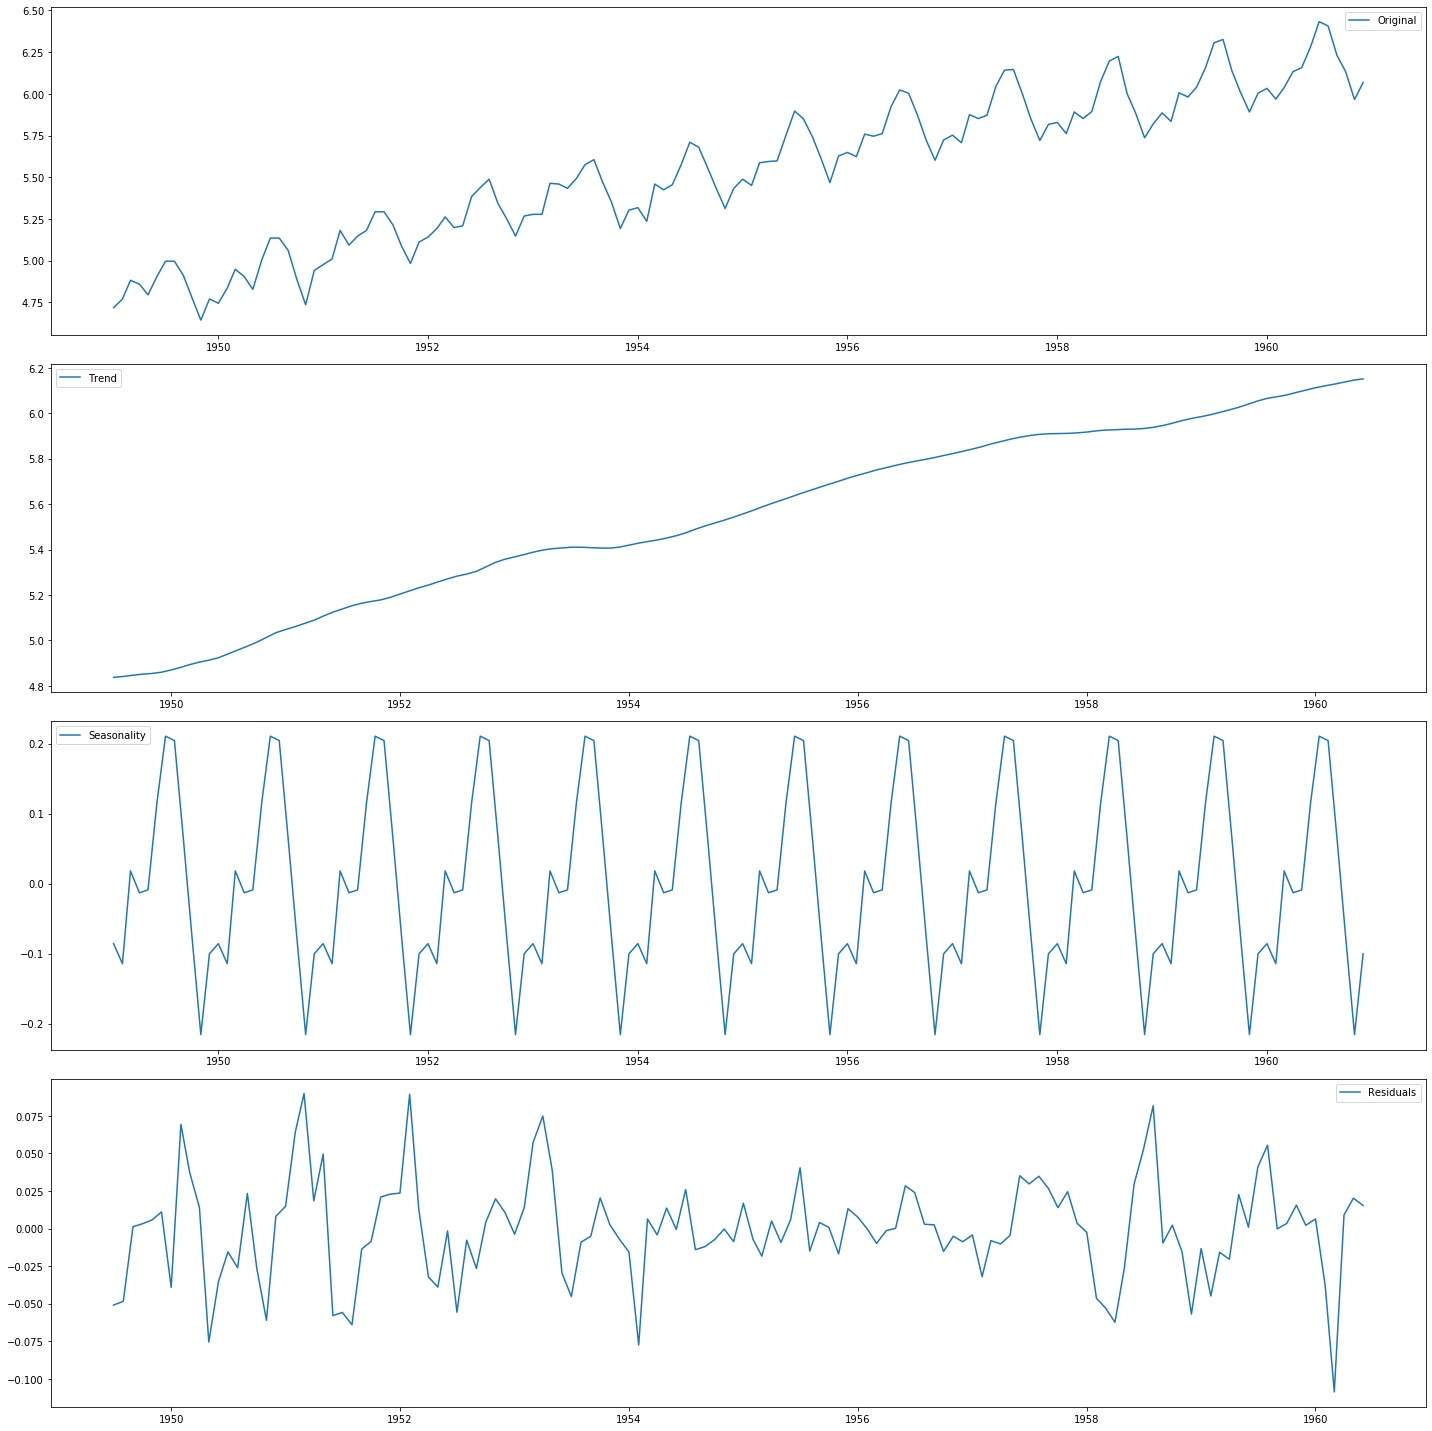

In [44]:
plt.figure(figsize=(20,20))
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

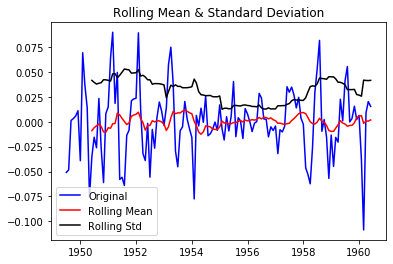

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [45]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

test_stationarity(ts_log_decompose)





In [46]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

In [47]:
lag_acf = acf(ts_log_diff, nlags=20)

lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


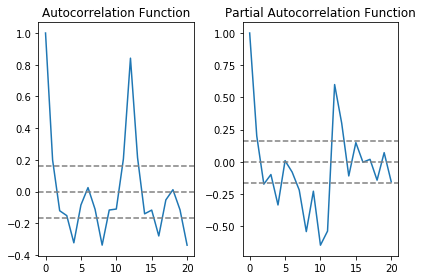

In [48]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [79]:

from statsmodels.tsa.arima_model import ARMA, ARIMA#, SARIMA

ts_log

ImportError: cannot import name 'SARIMA' from 'statsmodels.tsa.arima_model' (C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py)

In [60]:
#p q
#model = ARMA(ts_log, order=(2, 0))  


#model = ARMA(ts_log, order=(3, 2))


#p d q

model = ARIMA(ts_log, order=(2, 1,0))  

results_AR = model.fit()  



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [63]:

results_AR.fittedvalues.cumsum() + 4.718499 


Month
1949-02-01    4.728099
1949-03-01    4.746266
1949-04-01    4.772701
1949-05-01    4.756932
1949-06-01    4.754788
                ...   
1960-08-01    6.100425
1960-09-01    6.077282
1960-10-01    6.049162
1960-11-01    6.065679
1960-12-01    6.051966
Length: 143, dtype: float64

In [46]:
ts_log_diff = ts_log - ts_log.shift()

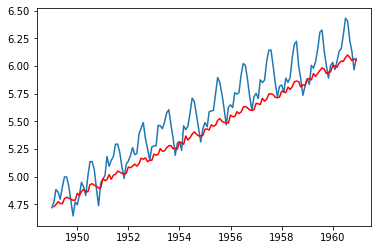

In [66]:



plt.plot(ts_log)

plt.plot(results_AR.fittedvalues.cumsum() + 4.718499 

, color='red')


#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [77]:
model = ARMA(ts_log, order=(2, 0)) 


results_AR = model.fit()  


results_AR.fittedvalues


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Month
1949-01-01    5.504986
1949-02-01    4.737219
1949-03-01    4.803655
1949-04-01    4.925839
1949-05-01    4.873471
                ...   
1960-08-01    6.439450
1960-09-01    6.374843
1960-10-01    6.170143
1960-11-01    6.093523
1960-12-01    5.915533
Length: 144, dtype: float64

In [78]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [79]:

train_ERROR = ts_log - results_AR.fittedvalues #--->>>> ACC/RMSE

train_ERROR


Month
1949-01-01   -0.786487
1949-02-01    0.033466
1949-03-01    0.079147
1949-04-01   -0.066026
1949-05-01   -0.077681
                ...   
1960-08-01   -0.032570
1960-09-01   -0.144362
1960-10-01   -0.036745
1960-11-01   -0.127377
1960-12-01    0.152892
Length: 144, dtype: float64

In [80]:
#future prediction

predictions = results_AR.predict(start=144, end=700)

predictions

1961-01-01    6.074778
1961-02-01    6.059613
1961-03-01    6.040103
1961-04-01    6.020195
1961-05-01    6.000777
                ...   
2007-01-01    5.504986
2007-02-01    5.504986
2007-03-01    5.504986
2007-04-01    5.504986
2007-05-01    5.504986
Freq: MS, Length: 557, dtype: float64

In [68]:
#reversing log transformation

prediction_values = np.exp(results_AR.predict(start=143, end=200))

prediction_values

1960-12-01    0.986381
1961-01-01    1.063922
1961-02-01    1.005983
1961-03-01    0.999712
1961-04-01    1.007926
1961-05-01    1.010963
1961-06-01    1.010254
1961-07-01    1.009562
1961-08-01    1.009522
1961-09-01    1.009631
1961-10-01    1.009664
1961-11-01    1.009653
1961-12-01    1.009645
1962-01-01    1.009644
1962-02-01    1.009646
1962-03-01    1.009646
1962-04-01    1.009646
1962-05-01    1.009646
1962-06-01    1.009646
1962-07-01    1.009646
1962-08-01    1.009646
1962-09-01    1.009646
1962-10-01    1.009646
1962-11-01    1.009646
1962-12-01    1.009646
1963-01-01    1.009646
1963-02-01    1.009646
1963-03-01    1.009646
1963-04-01    1.009646
1963-05-01    1.009646
1963-06-01    1.009646
1963-07-01    1.009646
1963-08-01    1.009646
1963-09-01    1.009646
1963-10-01    1.009646
1963-11-01    1.009646
1963-12-01    1.009646
1964-01-01    1.009646
1964-02-01    1.009646
1964-03-01    1.009646
1964-04-01    1.009646
1964-05-01    1.009646
1964-06-01    1.009646
1964-07-01 

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

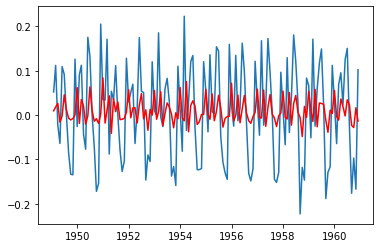

In [69]:


plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


In [87]:
model = ARIMA(ts_log, order=(0, 1, 2))  

results_MA = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

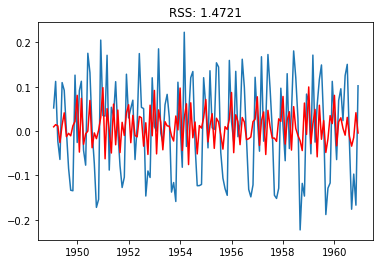

In [89]:
  
plt.plot(ts_log_diff)

plt.plot(results_MA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [94]:

#fbprophet
#pmdarima
#pyramid

##p d q values are 2 1 2

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX( ts_log, order=(2, 1, 2))#(P,D,Q,s))  



??model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [92]:



results_SARIMA = model.fit()  



In [93]:
results_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 128.890
Date:                Fri, 23 Oct 2020   AIC                           -247.780
Time:                        17:25:32   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2432      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2676      0.199      1.343      0.179      -0.123       0.658
ma.L1         -0.0868      0.118     -0.733      0.464      -0.319       0.145
ma.L2         -0.6812      0.142     -4.784      0.000      -0.960      -0.402
sigma2         0.0096      0.002      5.730      0.000       0.006       0.013
===================================================================================
Ljung-Box (Q):                      351.40   Jarque-Bera (JB):                 7.04
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.08   Skew:                            -0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
results_SARIMA.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.2432,0.166,1.469,0.142,-0.081,0.568
ar.L2,0.2676,0.199,1.343,0.179,-0.123,0.658
ma.L1,-0.0868,0.118,-0.733,0.464,-0.319,0.145
ma.L2,-0.6812,0.142,-4.784,0.000,-0.960,-0.402
sigma2,0.0096,0.002,5.730,0.000,0.006,0.013


<Figure size 1440x1440 with 0 Axes>

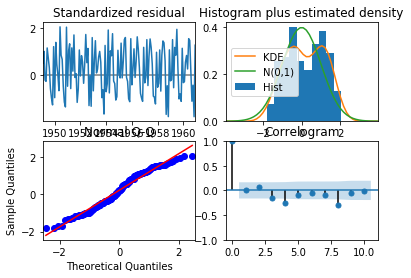

In [90]:
plt.figure(figsize=(20,20))

results_SARIMA.plot_diagnostics()

plt.show()

In [87]:
#results_ARIMA.plot_predict()

Text(0.5, 1.0, 'RSS: 1.0292')

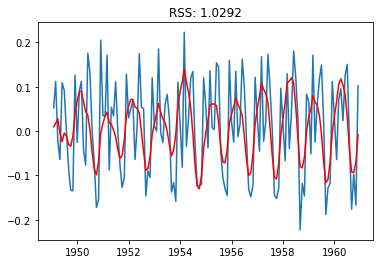

In [92]:



plt.plot(ts_log_diff)

plt.plot(results_ARIMA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [93]:
results_ARIMA.fittedvalues



Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64

In [94]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)


In [95]:
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [96]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()




predictions_ARIMA_diff_cumsum.head()



Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [97]:
#building the model

from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(train)

###stepwise 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [100]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [102]:
### train data last date - 1960-12-01

dti = pd.date_range('1961-01-01', periods=50, freq='MS')
## MS means monthly or monthly start

dti


DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [104]:
forecast = model.predict(n_periods=50)


forecast = pd.DataFrame(forecast,index = dti,columns=['Prediction'])
forecast.head()

,Prediction
1961-01-01,467.573743
1961-02-01,490.494463
1961-03-01,509.136849
1961-04-01,492.554700
1961-05-01,495.305958


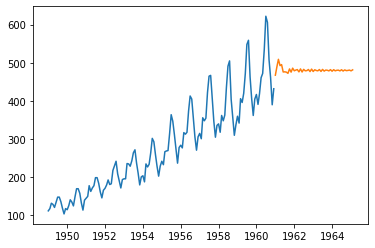

In [108]:

#plot the predictions for validation set
plt.plot(train["#Passengers"], label='Train')

#plt.plot(valid, label='Valid')

plt.plot(forecast, label='Prediction')


plt.show()